In [1]:
import pandas as pd
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('Real estate.csv')

In [19]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


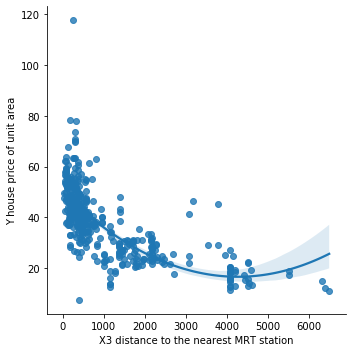

In [10]:
sns.lmplot(x = "X3 distance to the nearest MRT station" , y="Y house price of unit area",data = data,order = 2)

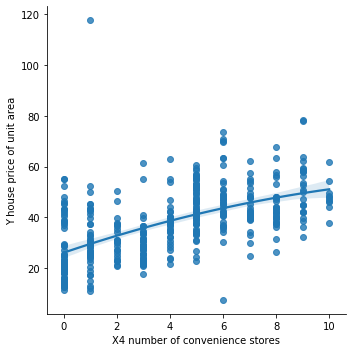

In [9]:
sns.lmplot(x = "X4 number of convenience stores" , y="Y house price of unit area",data = data,order = 2)

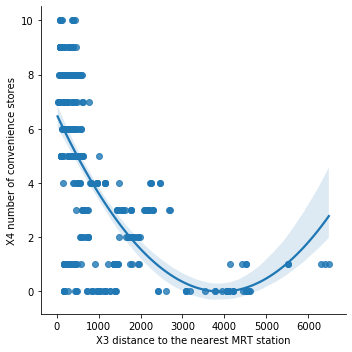

In [11]:
sns.lmplot(x = "X3 distance to the nearest MRT station" , y="X4 number of convenience stores",data = data,order = 2)

In [12]:
# x indicates array of independent variable
# y indicates array of dependent variable
X = np.array(data["X4 number of convenience stores"]).reshape(-1,1)
Y = np.array(data["Y house price of unit area"]).reshape(-1,1)

#Splitting the data into train and test partition into a 70-30 split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [13]:
#Making model for linear regression
model = linear_model.LinearRegression()
#Fitting training data into the model
model.fit(X_train,Y_train)

print("Coefficients : {}".format(model.coef_))
print("Variance score : {}".format(model.score(X_test,Y_test)))

Coefficients : [[2.69043942]]
Variance score : 0.24469139612599053


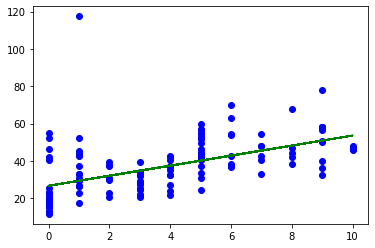

In [14]:
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test , color="b")
plt.plot(X_test,Y_pred,color="g")
plt.show()

Estimated Coeficient b0 = 27.18110478147242 , b1= 2.637653463404376


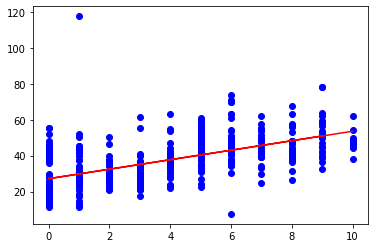

In [15]:
#Estimating the coeficients of correlation
def estimate_coef(x,y):
    n = np.size(x)

    m_x,m_y = np.mean(x) , np.mean(y)

    SS_xy = np.sum(y*x) - n*m_x * m_y
    SS_xx = np.sum(x*x) - n*m_x * m_x

    b1 = SS_xy/SS_xx
    b0 = m_y - b1*m_x

    return (b0,b1)

#Plotting the regression line
def plot_line(x,y,b):
    plt.scatter(x,y,color = "blue")

    y_pred = b[0] + b[1]*x
    plt.plot(x,y_pred,color="red")
    plt.show()

#Driver function to implement.
x = np.array(data["X4 number of convenience stores"])
y = np.array(data["Y house price of unit area"])

b = estimate_coef(x,y)
print("Estimated Coeficient b0 = {} , b1= {}".format(b[0],b[1]))

plot_line(x,y,b)